In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from scipy.stats import mannwhitneyu
import numpy as np

In [20]:
slim_baseline = pd.read_csv('../main/log/tie_new.csv', names=["algo", "experiment_id","only_inflate",   "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"])

In [21]:
slim_baseline.head()

,algo,experiment_id,only_inflate,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,...,elite_blocks,tie_inflate,diff_sn_inflate,size_sn_inflate,tie_deflate,diff_sn_deflate,size_sn_deflate,tie_mb_deflate,diff_sn_mb_deflate,size_sn_mb_deflate
0,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,0,15.497589,0.123029,1490.0,14.884969,...,1,0.19,99,100,0.00,1,100,0.0,1,100
1,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,1,15.032771,0.076619,1978.0,13.992104,...,2,0.09,97,100,0.00,1,100,0.0,1,100
2,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,2,14.925724,0.074076,2638.0,14.261933,...,3,0.55,99,100,0.01,1,100,0.0,1,100
3,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,3,14.128039,0.085020,3580.0,13.088785,...,4,0.34,100,100,0.01,2,100,0.0,3,100
4,SLIM*1SIG,0a34b5a1-1eaa-11ef-bc80-049226d8b1cb,True,yatch,0,4,13.637058,0.084020,4234.0,12.700195,...,5,0.45,99,100,0.02,3,100,0.0,7,100


In [22]:
results = pd.read_csv('../main/log/elite_change.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size","log","elite_child"])

In [23]:
chull = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","distance_chull", "elite_child"])

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_25016\1298671308.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  chull = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",


In [24]:
chull.algo = chull.algo.replace({'STD-GSGP':'SLIM+2SIG', 'GSGP*1SIG':'SLIM*1SIG',
       'GSGP*1NORM':'SLIM*1NORM'})

In [25]:
chull.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

In [26]:
results.shape

(4045555, 13)

In [27]:
results = results.merge(chull[["algo",  "threshold", "dataset", "seed", "generation", 'distance_chull']], how = 'left', on = ["algo",  "threshold", "dataset", "seed", "generation"])

In [28]:
results = results[results.dataset != '50'].reset_index(drop = True)

In [29]:
results.threshold = results.threshold.astype(int)

In [30]:
results.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

In [31]:
results.head()

,algo,experiment_id,threshold,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log,elite_child,distance_chull
34,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,0,15.497589,0.076020,1490.0,14.884969,7,1,False,1962.001661
35,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,1,15.497589,0.135038,3283.0,14.884969,7,1,True,2250.345450
36,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,2,15.497589,0.137035,5686.0,14.884969,7,1,True,2285.700061
37,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,3,15.480033,0.123031,7632.0,14.574218,52,1,False,2296.658135
38,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,4,15.476914,0.126031,8546.0,14.887196,26,1,False,2312.083156


In [32]:
results.algo.unique()

array(['SLIM+2SIG', 'SLIM*1SIG', 'SLIM*1NORM', nan], dtype=object)

In [33]:
colors = ['lightsalmon', 'lightblue', 'lightgreen']
e_colors = ['red', 'blue', 'green']
e_style = ['dashed', 'dotted', 'dashdot']

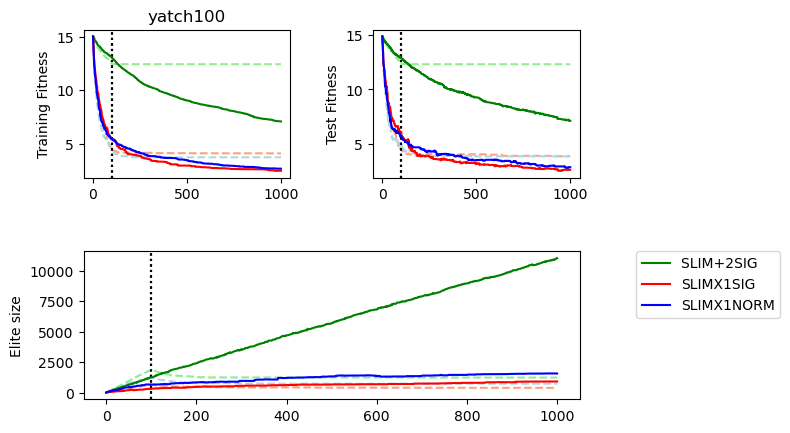

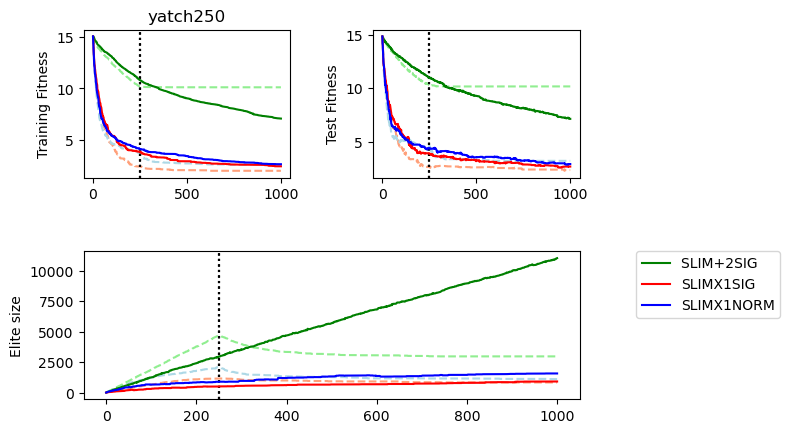

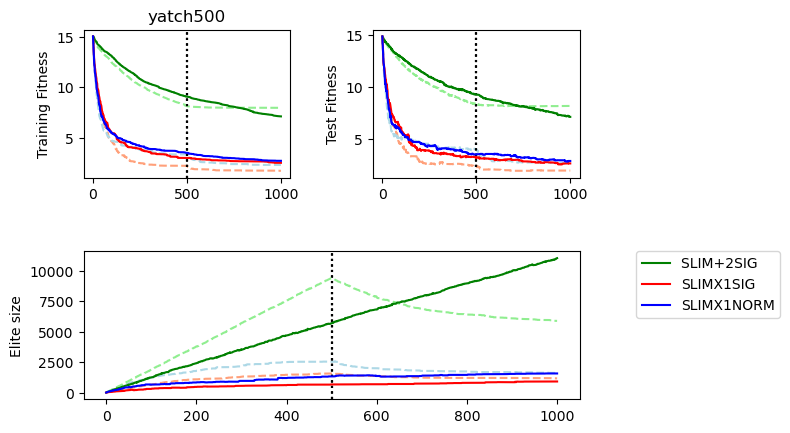

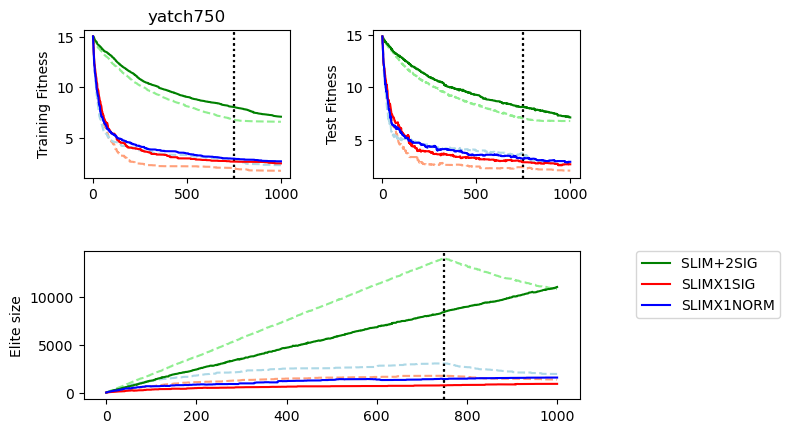

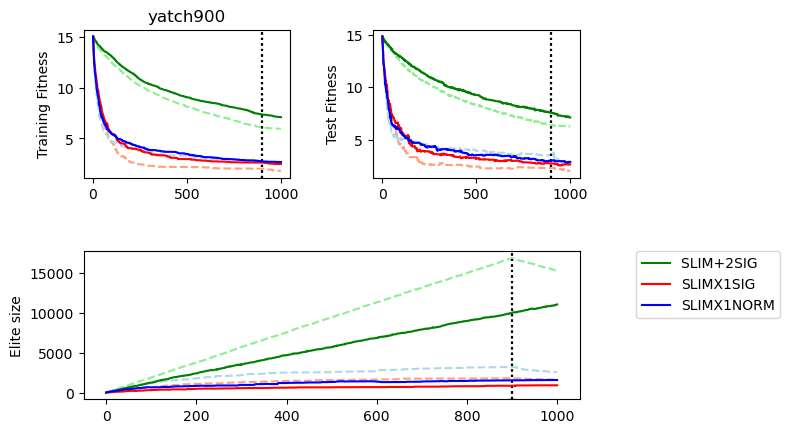

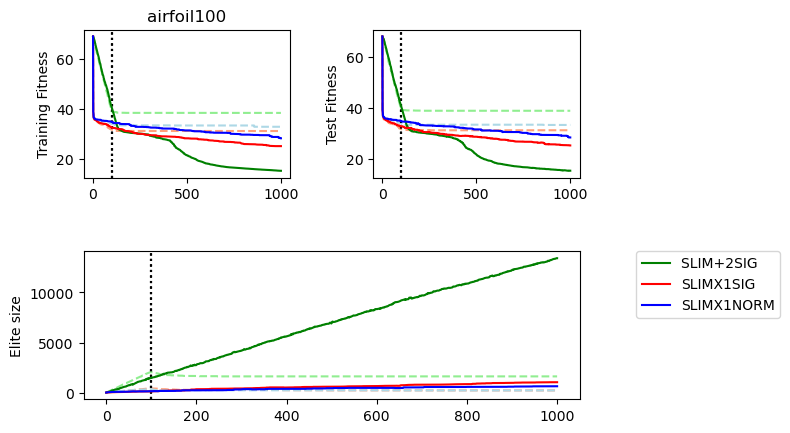

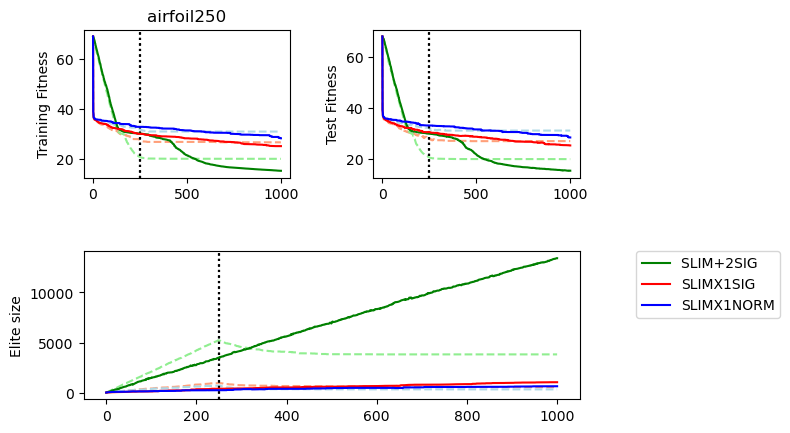

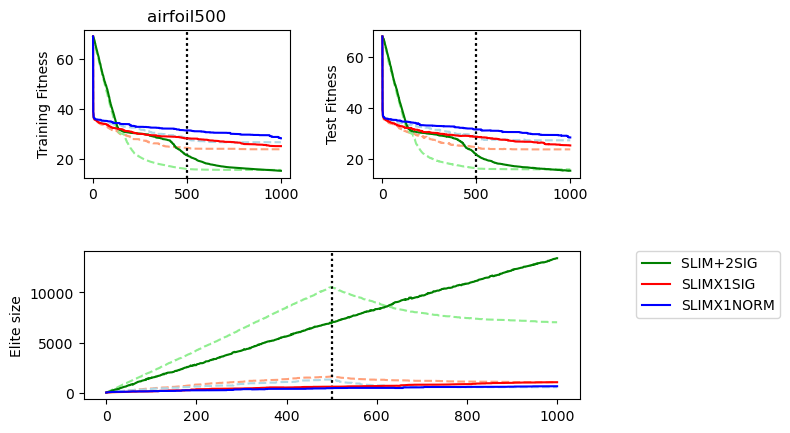

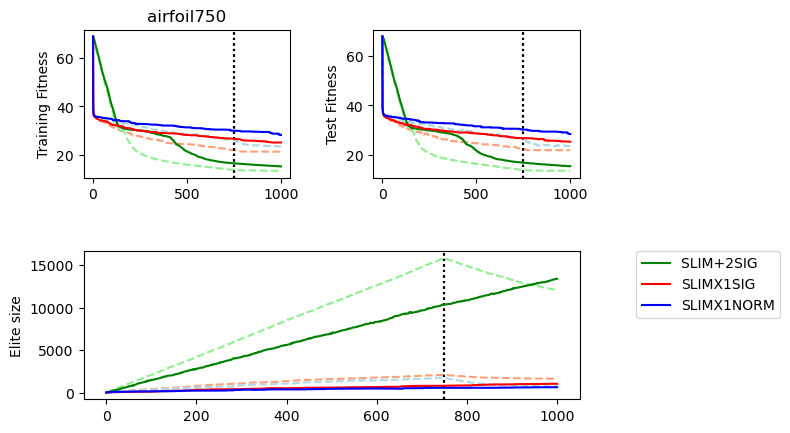

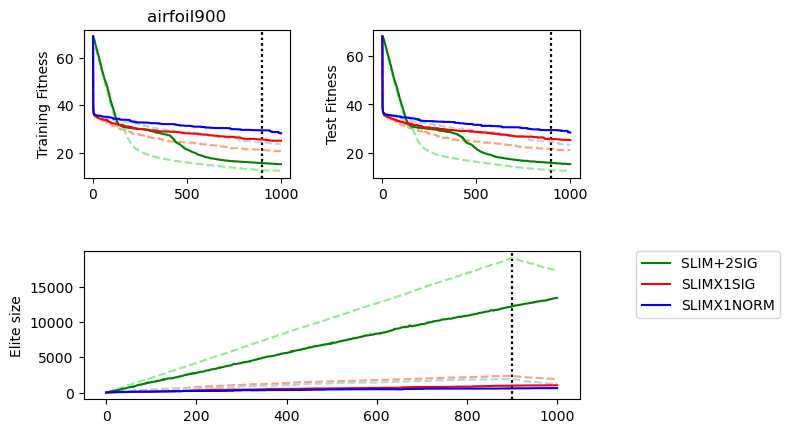

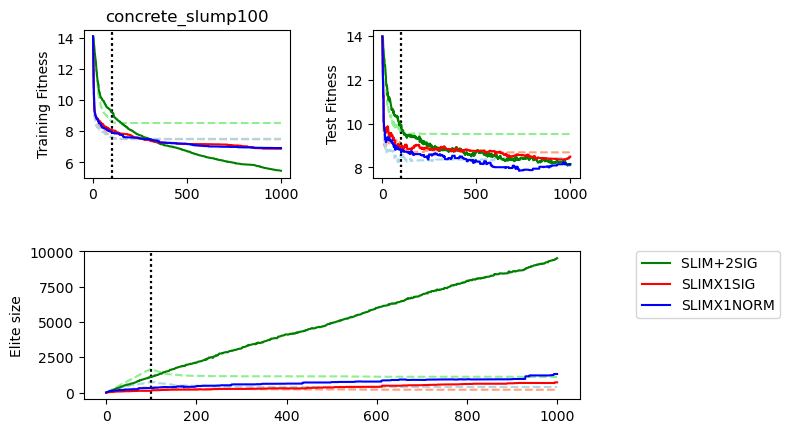

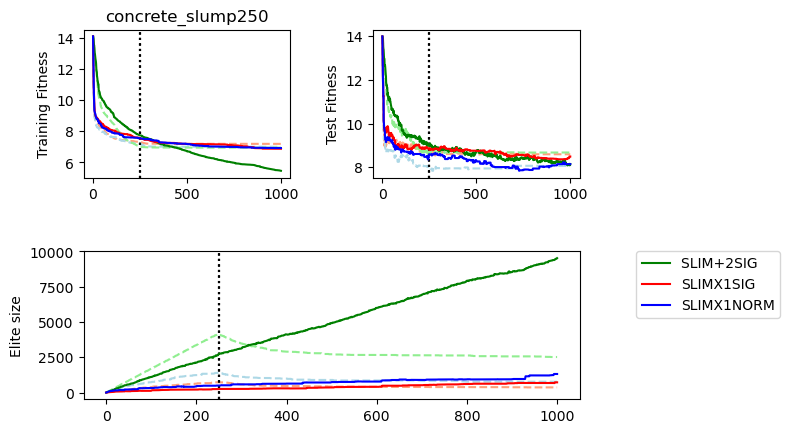

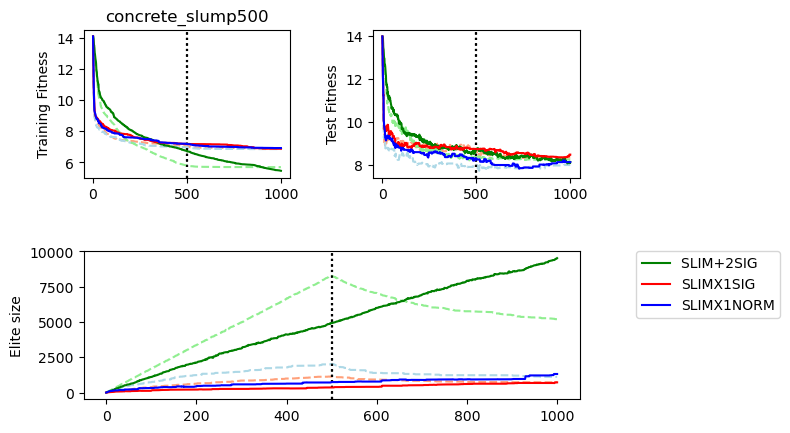

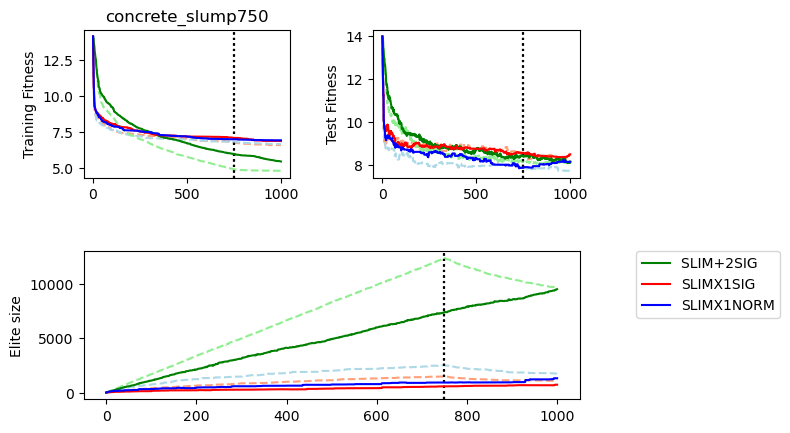

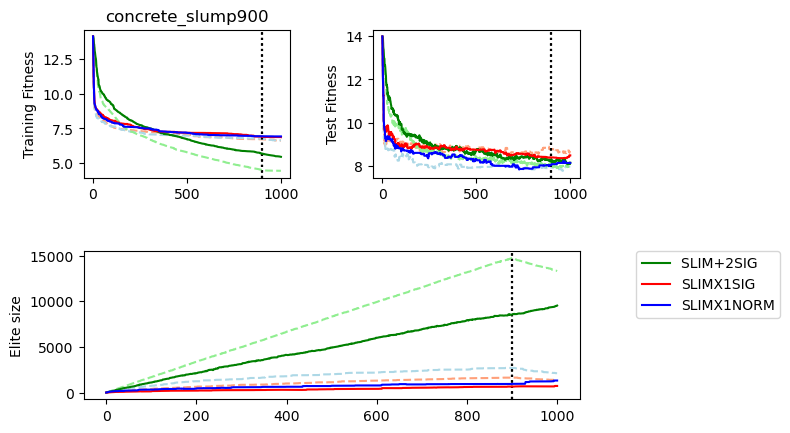

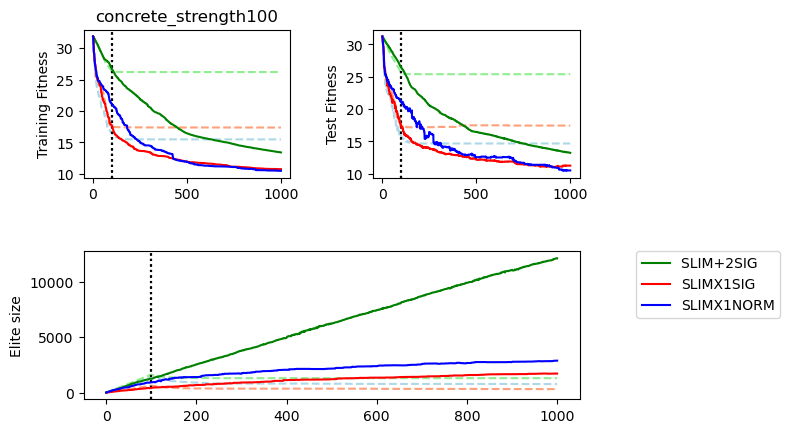

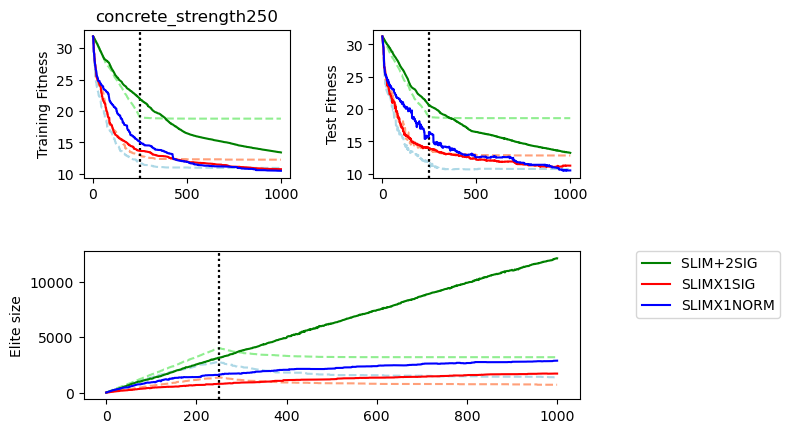

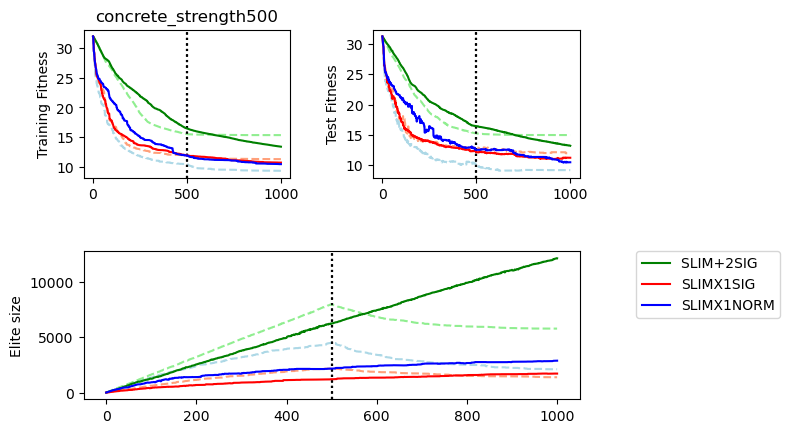

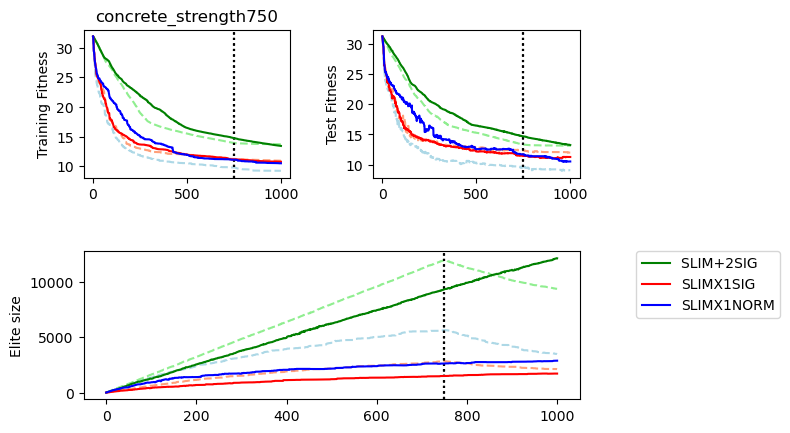

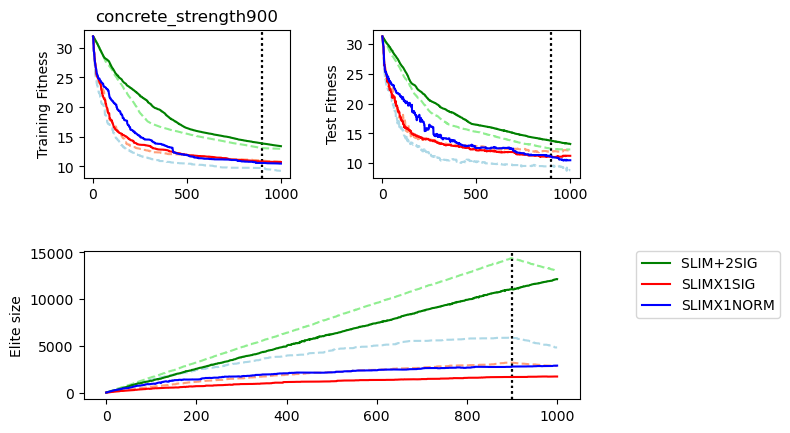

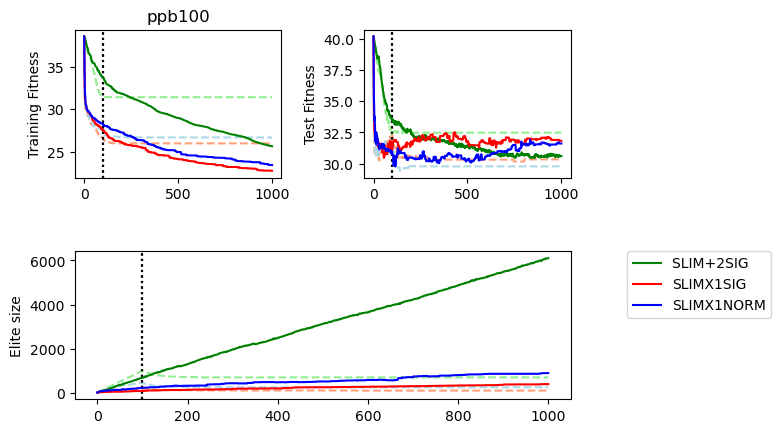

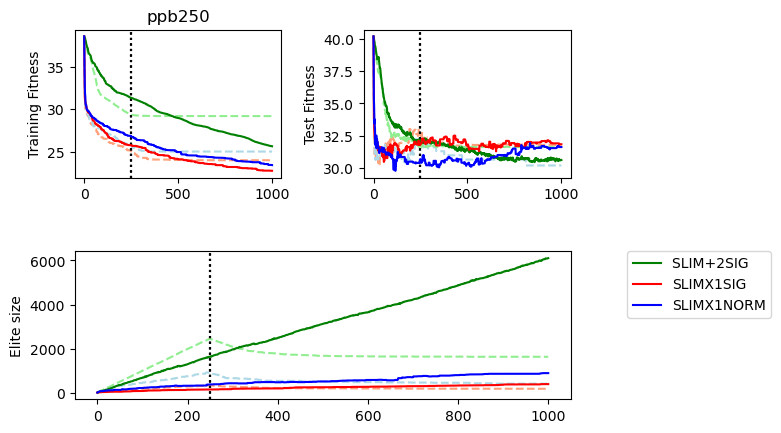

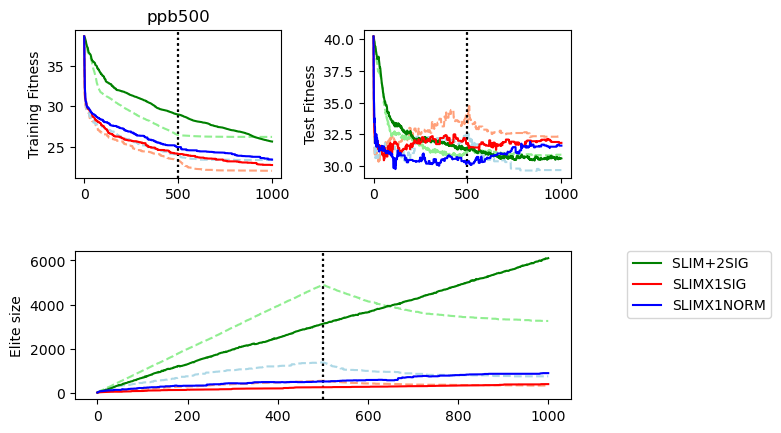

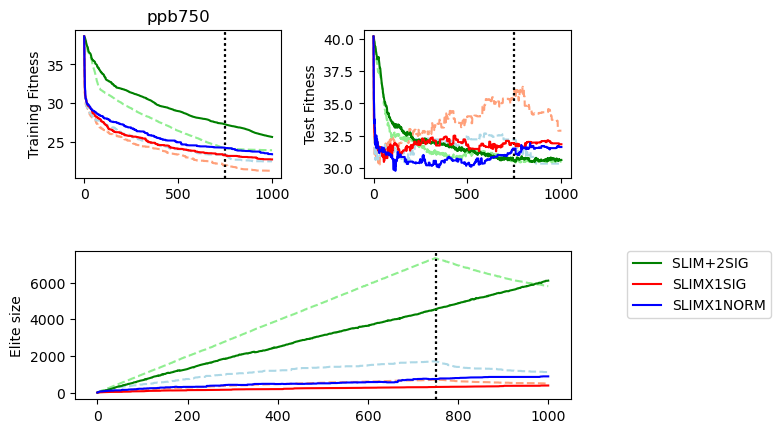

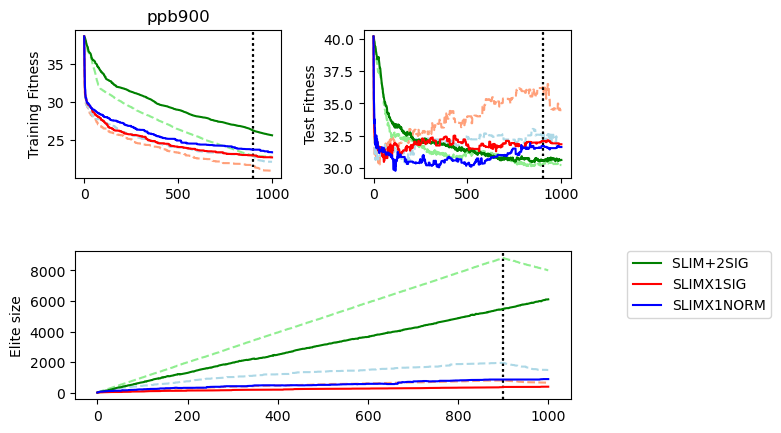

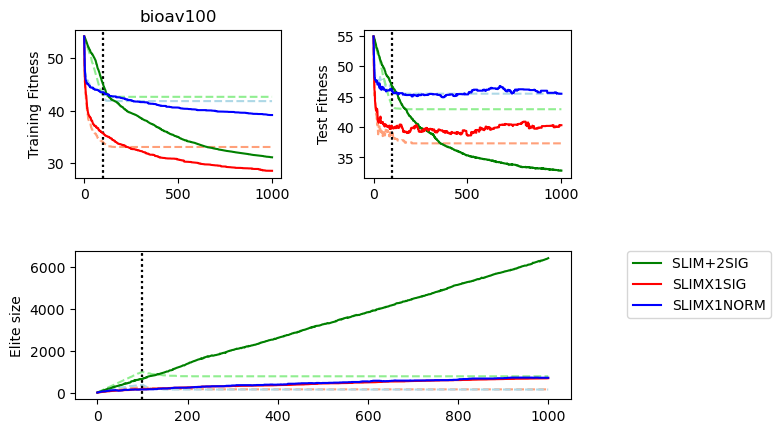

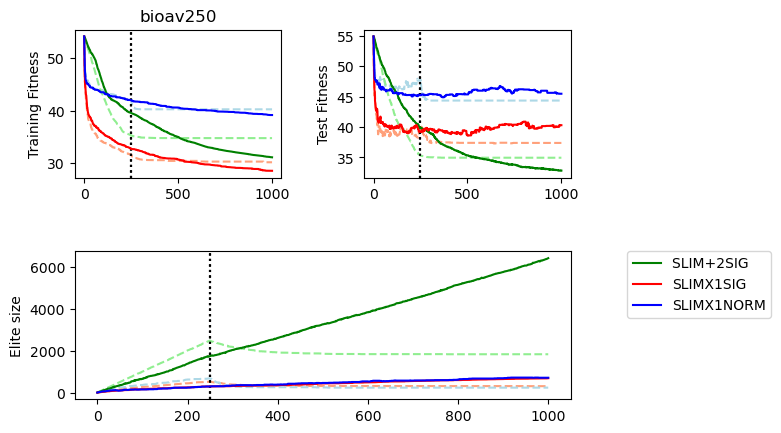

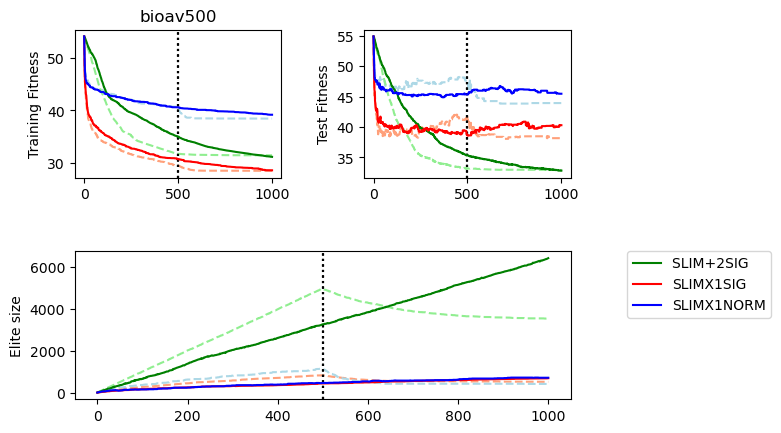

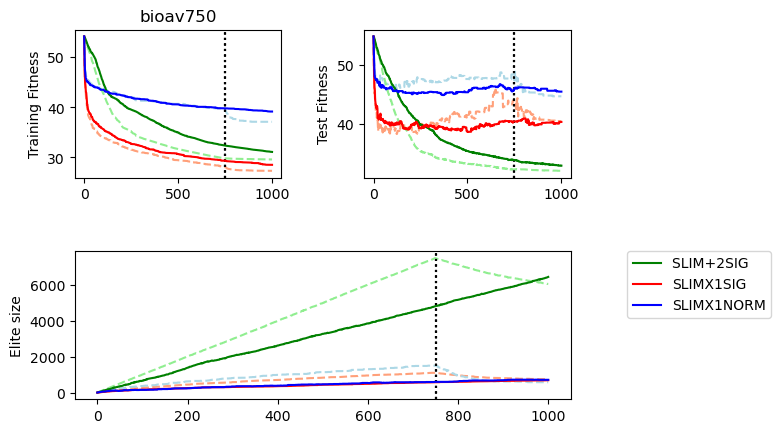

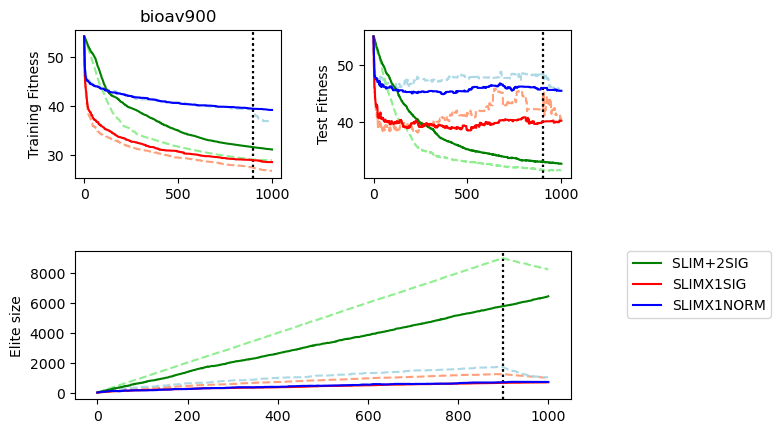

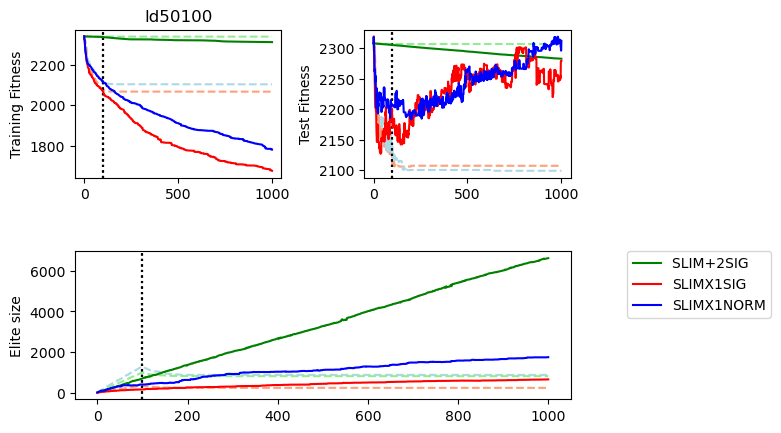

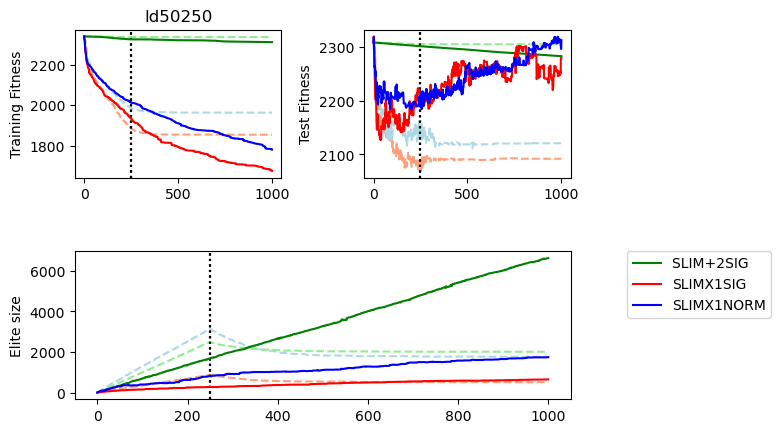

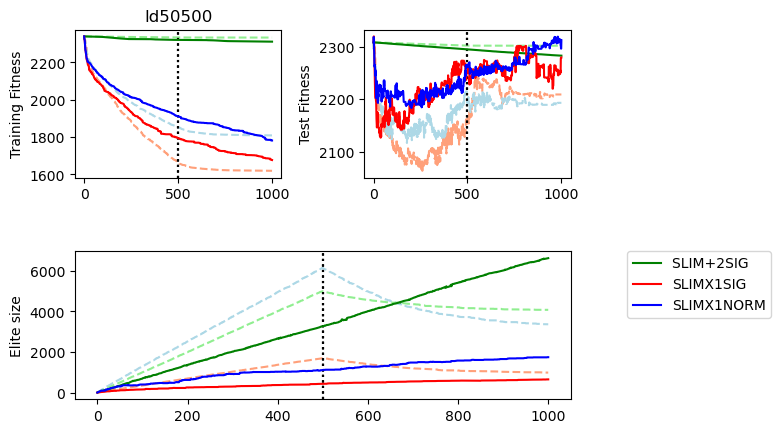

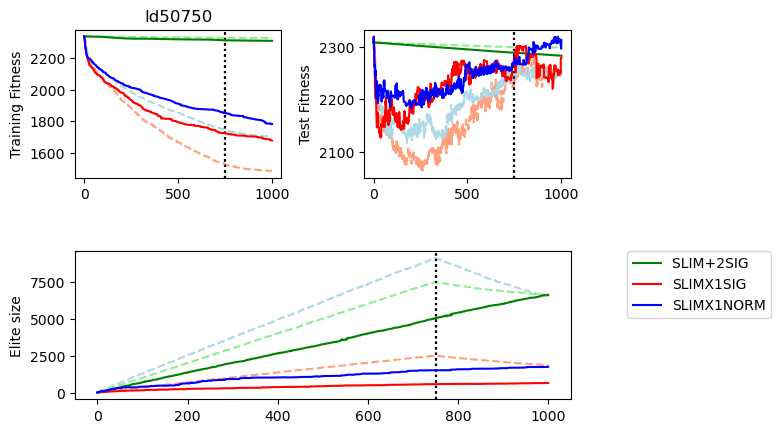

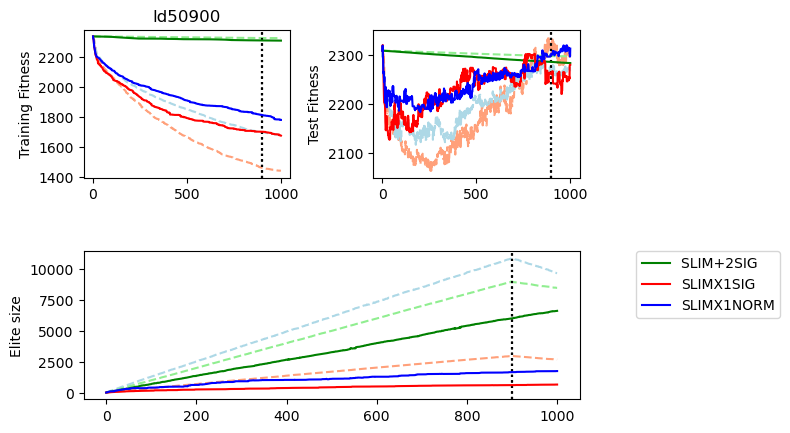

In [43]:
for data in results.dataset.unique():
    
    std_gsgp = results.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
    gsgp_x1sig = results.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
    gsgp_x1norm = results.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()


    slim_std_gsgp = slim_baseline.query("algo == 'SLIM+2SIG'  and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
    slim_gsgp_x1sig = slim_baseline.query("algo == 'SLIM*1SIG' and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
    slim_gsgp_x1norm = slim_baseline.query("algo == 'SLIM*1NORM'  and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()


    
    for th in [100, 250, 500, 750, 900]:
        gs = gridspec.GridSpec(2, 2)
        gs.update( wspace=0.4, hspace = 0.5)
        pl.figure()
        
        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
        
            
            grouped = results.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "elite_child"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax2.set_ylabel('Test Fitness')
            
            
            # ax3 = pl.subplot(gs[1, 0]) 
            # pl.plot(grouped.index, grouped['distance_chull'], color = colors[i], linestyle = 'dashed') #, label = algo
            # pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            # ax3.set_ylabel('CHull distance to GO')
            
            ax4 = pl.subplot(gs[1, :]) #1,1 
            # for j, it in enumerate(grouped['elite_change'].values):
            #     if j > th and it == 1:
            #         pl.axvline(x = j, color = colors[i])
            pl.plot(grouped.index, grouped['elite_size'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            # ax4.set_ylim(0, 3000)

            ax4.set_ylabel('Elite size')

    
        ax1 = pl.subplot(gs[0, 0]) 
        # pl.plot(std_gsgp.index, std_gsgp['training_fitness'], label = '+2SIG (STD_GSGP)', color = 'green')
        # pl.plot(gsgp_x1sig.index, gsgp_x1sig['training_fitness'], label = 'X1SIG', color = 'red')
        # pl.plot(gsgp_x1norm.index, gsgp_x1norm['training_fitness'], label = 'X1NORM', color = 'blue')
        pl.plot(std_gsgp.index, slim_std_gsgp['training_fitness'], label = 'SLIM+2SIG ', color = 'green')
        pl.plot(gsgp_x1sig.index, slim_gsgp_x1sig['training_fitness'], label = 'SLIMX1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, slim_gsgp_x1norm['training_fitness'], label = 'SLIMX1NORM', color = 'blue')


        ax2 = pl.subplot(gs[0, 1]) 
        # pl.plot(std_gsgp.index, std_gsgp['test_fitness'], label = '+2SIG (STD_GSGP)', color = 'green')
        # pl.plot(gsgp_x1sig.index, gsgp_x1sig['test_fitness'], label = 'X1SIG', color = 'red')
        # pl.plot(gsgp_x1norm.index, gsgp_x1norm['test_fitness'], label = 'X1NORM', color = 'blue')
        pl.plot(std_gsgp.index, slim_std_gsgp['test_fitness'], label = 'SLIM+2SIG ', color = 'green')
        pl.plot(gsgp_x1sig.index, slim_gsgp_x1sig['test_fitness'], label = 'SLIMX1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, slim_gsgp_x1norm['test_fitness'], label = 'SLIMX1NORM', color = 'blue')


        # ax3 = pl.subplot(gs[1, 0]) 
        # pl.plot(std_gsgp.index, std_gsgp['distance_chull'], label = '+2SIG (STD_GSGP)', color = 'green')
        # pl.plot(gsgp_x1sig.index, gsgp_x1sig['distance_chull'], label = 'X1SIG', color = 'red')
        # pl.plot(gsgp_x1norm.index, gsgp_x1norm['distance_chull'], label = 'X1NORM', color = 'blue')

        ax4 = pl.subplot(gs[1, :]) #1,1 
        # pl.plot(std_gsgp.index, std_gsgp['elite_size'], label = '+2SIG (STD_GSGP)', color = 'green')
        # pl.plot(gsgp_x1sig.index, gsgp_x1sig['elite_size'], label = 'X1SIG', color = 'red')
        # pl.plot(gsgp_x1norm.index, gsgp_x1norm['elite_size'], label = 'X1NORM', color = 'blue')
        pl.plot(std_gsgp.index, slim_std_gsgp['elite_size'], label = 'SLIM+2SIG ', color = 'green')
        pl.plot(gsgp_x1sig.index, slim_gsgp_x1sig['elite_size'], label = 'SLIMX1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, slim_gsgp_x1norm['elite_size'], label = 'SLIMX1NORM', color = 'blue')
            

        ax1.set_title(data + str(th))
        ax4.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()

In [56]:
def stat_test(measure, alpha = 0.05):
    
    total_results =  []
    
    for data in results.dataset.unique():
        
        slim_std_gsgp = slim_baseline.query("algo == 'SLIM+2SIG'  and dataset == @data and generation == 1000")[measure].values
        slim_gsgp_x1sig = slim_baseline.query("algo == 'SLIM*1SIG' and dataset == @data and generation == 1000")[measure].values
        slim_gsgp_x1norm = slim_baseline.query("algo == 'SLIM*1NORM'  and dataset == @data and generation == 1000")[measure].values

        baselines = [
                    slim_gsgp_x1sig,
                    slim_gsgp_x1norm,
                    slim_std_gsgp]
    

        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
            
            th_results = []
            
            for th in [100, 250, 500, 750, 900]:

                variant = results.query("algo == @algo and dataset == @data and threshold == @th and generation == 1000")[measure].values

                p_value_n = mannwhitneyu(baselines[i], variant)[1]
                p_value_s = str(round(p_value_n, 4)) if 'e' not in str(p_value_n) else (str(p_value_n).split('e')[0][:5] + 'e' + str(p_value_n)[-3:])
                if p_value_n <= alpha:
                    if np.median(baselines[i]) > np.median(variant):
                        p_value_s +=' *'
                        
                    p_value_s = 'bo{ ' + p_value_s + ' }bc'
                
                th_results.append(p_value_s)


            total_results.append([data, algo] + th_results)

    total_results = pd.DataFrame(total_results, columns = ['Data', 'Algorithm', 100, 250, 500, 750, 900])
    total_results.set_index(['Data', 'Algorithm'], inplace = True, drop = True)
    return total_results

In [57]:
test_stat = stat_test('test_fitness', alpha = 0.05)

In [58]:
size_stat = stat_test('elite_size', alpha = 0.05)

In [59]:
print(test_stat.to_latex())

\begin{tabular}{lllllll}
\toprule
 &  & 100 & 250 & 500 & 750 & 900 \\
Data & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{yatch} & SLIM*1SIG & bo{ 4.211e-05 }bc & 0.1722 & bo{ 0.0167 * }bc & bo{ 0.0275 * }bc & bo{ 0.0387 * }bc \\
 & SLIM*1NORM & bo{ 0.0009 }bc & 0.5692 & 0.1722 & 0.1224 & 0.4643 \\
 & SLIM+2SIG & bo{ 2.285e-13 }bc & bo{ 2.338e-08 }bc & 0.0831 & 0.2604 & bo{ 0.0081 * }bc \\
\cline{1-7}
\multirow[t]{3}{*}{airfoil} & SLIM*1SIG & bo{ 2.776e-12 }bc & bo{ 0.0387 }bc & bo{ 0.0062 * }bc & bo{ 7.145e-06 * }bc & bo{ 6.172e-07 * }bc \\
 & SLIM*1NORM & bo{ 3.880e-06 }bc & bo{ 0.0112 }bc & 0.0757 & bo{ 0.0001 * }bc & bo{ 7.537e-05 * }bc \\
 & SLIM+2SIG & bo{ 3.477e-14 }bc & bo{ 0.0002 }bc & 0.4854 & 0.9148 & 0.4591 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump} & SLIM*1SIG & 0.7482 & 0.4748 & 0.2984 & 0.3803 & 0.7224 \\
 & SLIM*1NORM & 0.2789 & 0.794 & 0.6781 & 0.4908 & 0.7547 \\
 & SLIM+2SIG & bo{ 0.0004 }bc & 0.3399 & 0.9898 & 0.5349 & 0.3897 \\
\cline{1-7}
\multir

In [60]:
print(size_stat.to_latex())

\begin{tabular}{lllllll}
\toprule
 &  & 100 & 250 & 500 & 750 & 900 \\
Data & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{yatch} & SLIM*1SIG & 0.3803 & 0.9966 & 0.8139 & 0.4186 & 0.0861 \\
 & SLIM*1NORM & 0.1517 & 0.8439 & 0.9829 & 0.5692 & 0.1517 \\
 & SLIM+2SIG & bo{ 1.370e-14 * }bc & bo{ 1.573e-10 * }bc & 1.0 & 1.0 & 1.0 \\
\cline{1-7}
\multirow[t]{3}{*}{airfoil} & SLIM*1SIG & bo{ 0.0002 * }bc & 0.9795 & 1.0 & 0.8742 & 0.3642 \\
 & SLIM*1NORM & bo{ 0.0005 * }bc & 0.2007 & 0.9659 & 0.8607 & 0.4513 \\
 & SLIM+2SIG & bo{ 1.370e-14 * }bc & bo{ 4.235e-14 * }bc & 1.0 & 1.0 & 1.0 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump} & SLIM*1SIG & 0.0917 & 0.9966 & 0.9966 & 0.6105 & 0.0779 \\
 & SLIM*1NORM & 0.2733 & 0.8742 & 1.0 & 0.8708 & 0.2496 \\
 & SLIM+2SIG & bo{ 1.370e-14 * }bc & bo{ 2.280e-08 * }bc & 1.0 & 1.0 & 1.0 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_strength} & SLIM*1SIG & bo{ 1.054e-13 * }bc & bo{ 0.0008 * }bc & 0.7907 & 0.794 & 0.1123 \\
 & SLIM*1NORM & bo{ 7.589e